# Homework 2: U.S. Boundary Currents

Name: Ryan Yee

Date: 9/2/2024

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [118]:
# import modules here
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr

### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [119]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')

In [120]:
# store the velocity components and longitude/latitude data
# into numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
lon = np.array(ds_east['longitude'])
lat = np.array(ds_east['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

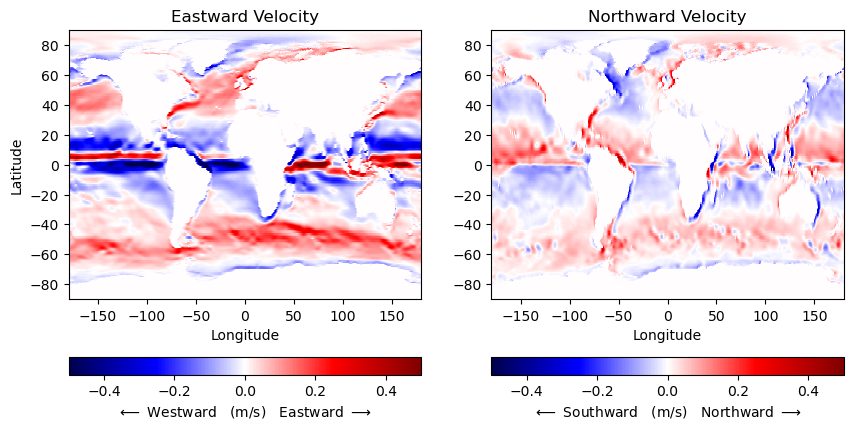

In [121]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -0.5, vmax=0.5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');
plt.show()


### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

# Answers:
1. a)The direction of the surface currents are moving northward on the east coast and southward on the west coast of the U.S. at  degrees notrth

   b)The direction of the surface currents are moving eastward on the east coast and southward on the west coast of the U.S. at 45 degrees north
2. The east coast current flows faster.
3. The gyres on the North Atlantic and the North Pacific both flow in a clockwise direction therefore the currents on the west and east coast both follow this circular motion. In the case of the east coast it is northward, whereas the west coast is southward.

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [122]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_theta = xr.open_dataset('THETA_2015_12.nc')

In [123]:
# store the THETA grid into a into numpy array
theta_np = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

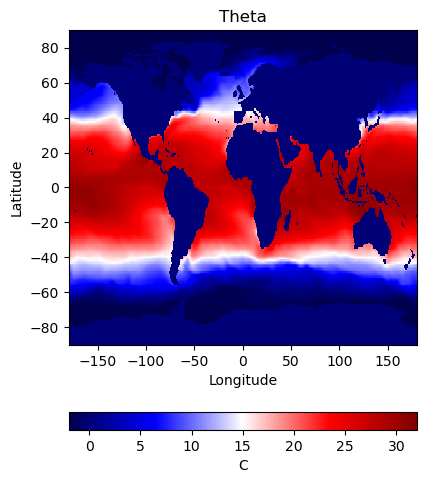

In [124]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,theta_np[0, 0, :, :], vmin = -2, vmax=32, cmap='seismic')
plt.colorbar(C, orientation='horizontal',label='C')
plt.title('Theta')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.tight_layout()
plt.show()

### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

# Answers:
1. The temperature on the west coast of the U.S. is colder at the same latitude compared to the east coast.
2. Ocean currents contribute to this temperature regime due to the gyres in the ocean. Since the east coast current flows in a northward direction due to the ocean gyres, the warmer water from the equator flows northward whereas the west coast current flows in a downward direction bringing the colder warer from the north downwards.

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [125]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook
ds_wvelstar = xr.open_dataset('WVELSTAR_2015_12.nc')

In [126]:
# store the WVELSTAR grid into a into numpy array
wvelstar_np = np.array(ds_wvelstar['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [127]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

depth_np = np.array(ds_wvelstar['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

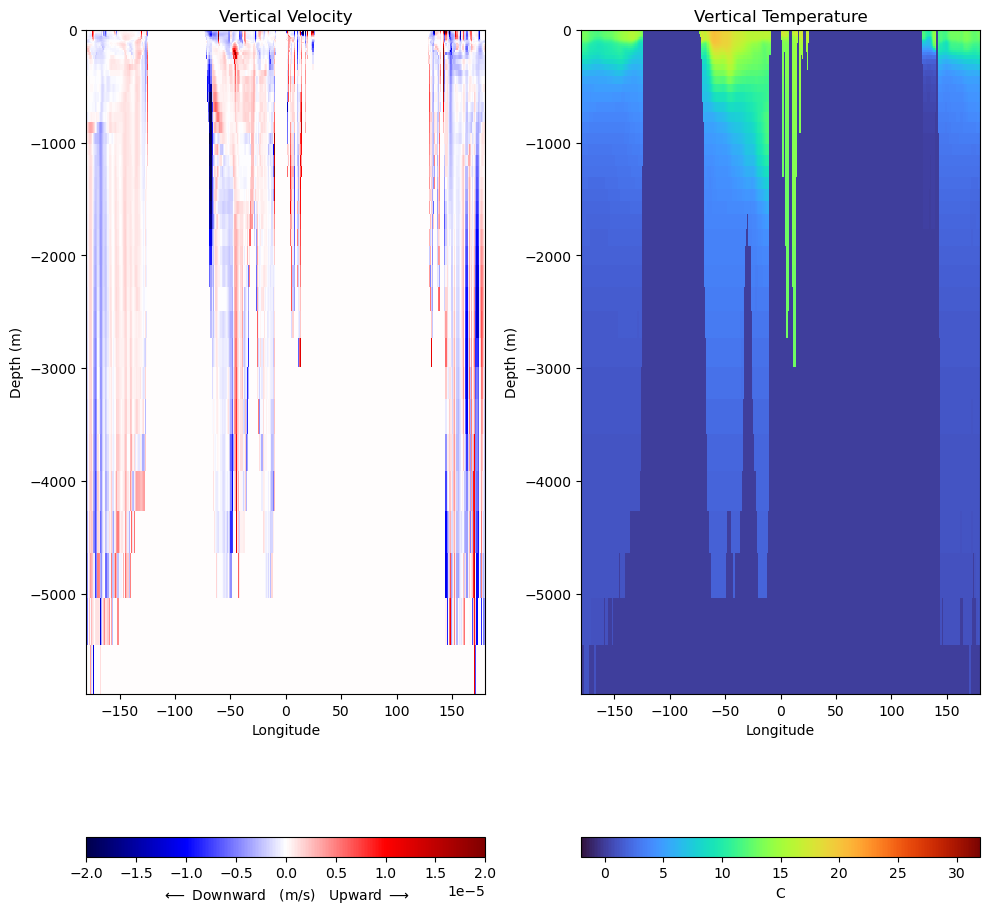

In [128]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,depth_np,wvelstar_np[0, :, 259, :],vmin=-2e-5, vmax=2e-5, cmap='seismic')
plt.colorbar(C, orientation='horizontal',label='$\longleftarrow$ Downward   (m/s)   Upward $\longrightarrow$')
plt.title('Vertical Velocity')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')
# make a subplot of the vertical profile of temperature
plt.subplot(1,2,2)
C = plt.pcolormesh(lon,depth_np,theta_np[0, :, 259, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',label='C')
plt.title('Vertical Temperature')
plt.ylabel('Depth (m)')
plt.xlabel('Longitude')
plt.tight_layout()
plt.show()

### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

# Answers:
1. The vertical velocity in the current on the west coast is a lot slower compared to the east coast
2. The speed of vertical velocity is significantly slower than that of horizontal velocity. Vertical velocity is primarily driven by the temperature and salinity of ocean water, which affect its density. Differences in density, combined with gravity, result in vertical movement, where denser water sinks and displaces less dense water. In contrast, horizontal velocity is driven by large-scale mechanisms such as the Coriolis effect, wind stress, and ocean gyres, creating faster movement.
3. Vertical currents adjacent to the coastline influence surface temperature as they can bringing colder water to the surface or push warmer surface water downward.
4. According to the Ekman Spiral, as wind blows across the ocean surface, the deeper layers are also affected by the winds. As the deeper layers move, it can result in the vertical velocity of ocean water due it's density which is affected by temperature and salinity, therefore casuing water to sink or rise. 